In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


# Use the connection to extract SQL data
education_df = pd.read_sql_query('SELECT * FROM useducation', con=engine)

# Close the connection
engine.dispose()

In [3]:
print(education_df.isnull().sum()/education_df.isnull().count())

#Fill in missing values using interpolation, based on state
fill_cols = list(education_df.columns.drop(['PRIMARY_KEY', 'STATE', 'YEAR']))
unique_states = education_df['STATE'].unique()

for state in unique_states:
    education_df.loc[education_df["STATE"] == state, fill_cols] = education_df.loc[education_df["STATE"] == state, fill_cols].interpolate()
    
#Percentage of remaining missing values per category:
education_df.isnull().sum()/education_df.isnull().count()

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.176273
TOTAL_REVENUE                   0.142091
FEDERAL_REVENUE                 0.142091
STATE_REVENUE                   0.142091
LOCAL_REVENUE                   0.142091
TOTAL_EXPENDITURE               0.142091
INSTRUCTION_EXPENDITURE         0.142091
SUPPORT_SERVICES_EXPENDITURE    0.142091
OTHER_EXPENDITURE               0.176273
CAPITAL_OUTLAY_EXPENDITURE      0.142091
GRADES_PK_G                     0.115952
GRADES_KG_G                     0.088472
GRADES_4_G                      0.087802
GRADES_8_G                      0.087802
GRADES_12_G                     0.087802
GRADES_1_8_G                    0.087802
GRADES_9_12_G                   0.087802
GRADES_ALL_G                    0.115952
AVG_MATH_4_SCORE                0.640751
AVG_MATH_8_SCORE                0.643432
AVG_READING_4_SCORE             0.642761
AVG_READING_8_SC

PRIMARY_KEY                     0.000000
STATE                           0.000000
YEAR                            0.000000
ENROLL                          0.141421
TOTAL_REVENUE                   0.107909
FEDERAL_REVENUE                 0.107909
STATE_REVENUE                   0.107909
LOCAL_REVENUE                   0.107909
TOTAL_EXPENDITURE               0.107909
INSTRUCTION_EXPENDITURE         0.107909
SUPPORT_SERVICES_EXPENDITURE    0.107909
OTHER_EXPENDITURE               0.141421
CAPITAL_OUTLAY_EXPENDITURE      0.107909
GRADES_PK_G                     0.032842
GRADES_KG_G                     0.004692
GRADES_4_G                      0.004692
GRADES_8_G                      0.004692
GRADES_12_G                     0.004692
GRADES_1_8_G                    0.004692
GRADES_9_12_G                   0.004692
GRADES_ALL_G                    0.032842
AVG_MATH_4_SCORE                0.144102
AVG_MATH_8_SCORE                0.146783
AVG_READING_4_SCORE             0.162198
AVG_READING_8_SC

In [5]:
education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

In [6]:
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.281000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.331000e+03,1.281000e+03,...,1485.000000,1485.000000,1485.000000,1.485000e+03,1.485000e+03,1.443000e+03,1277.000000,1273.000000,1250.000000,1097.000000
mean,2004.433646,9.166431e+05,9.246804e+06,7.772786e+05,4.289618e+06,4.179907e+06,9.342417e+06,4.844756e+06,2.725092e+06,4.348513e+05,...,64216.228283,63883.304040,54378.534680,5.161999e+05,2.463631e+05,8.016962e+05,232.814597,277.190134,218.415385,263.449974
std,7.393983,1.067856e+06,1.200350e+07,1.155857e+06,5.674137e+06,5.608607e+06,1.220752e+07,6.433283e+06,3.420267e+06,5.426507e+05,...,80504.894652,79037.699179,68781.870366,6.442378e+05,3.092694e+05,9.820252e+05,10.624230,10.360192,7.925924,5.793772
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.200842e+06,1.910190e+05,1.172219e+06,7.254095e+05,2.176975e+06,1.177296e+06,6.447875e+05,1.043740e+05,...,13311.000000,13018.000000,10741.000000,1.071090e+05,5.008300e+04,1.727145e+05,226.521892,271.201400,214.240213,259.838592
50%,2004.000000,6.515540e+05,5.169926e+06,4.100510e+05,2.578149e+06,2.089445e+06,5.298267e+06,2.688963e+06,1.545738e+06,2.741430e+05,...,42784.000000,43018.000000,36469.000000,3.425700e+05,1.622720e+05,5.449220e+05,234.531807,278.991890,220.066145,264.319646
75%,2011.000000,1.014528e+06,1.109900e+07,8.440360e+05,5.185174e+06,4.808003e+06,1.087317e+07,5.641158e+06,3.307162e+06,5.261780e+05,...,75322.000000,76376.000000,67716.000000,6.102640e+05,2.913940e+05,9.282755e+05,240.979792,284.092212,223.838858,267.490028
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


The mean of TOTAL_EXPENDITURE exceeds the mean of TOTAL_REVENUE, which means the states have run a deficit over the years, on average. On average, math scores are higher than reading scores, but the distribution of math scores (standard deviation) is wider than that of reading scores (i.e. although the average student tends to do better in math, there are more low-performing and high-performing math students than reading students, in which they tend to fall closer to the average). State and Local Revenue each exceed Federal Revenue by a factor of 5, which indicates that FEDERAL_REVENUE doesn't contribute as significantly to the TOTAL_REVENUE. The majority of Expenditures come from INSTRUCTION_EXPENDITURE, although SUPPORT_SERVICE_EXPENDITURE is also significant.

### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

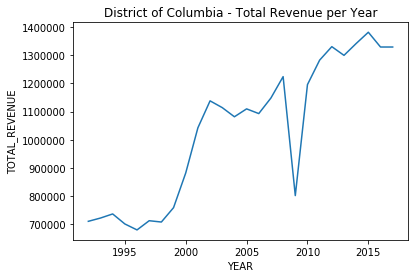

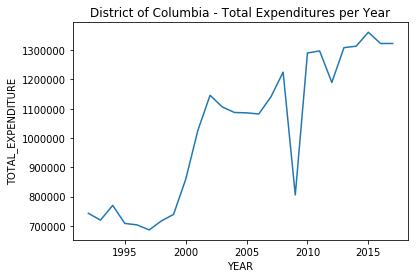

In [7]:
unique_years = education_df['YEAR'].unique()
state = 'DISTRICT_OF_COLUMBIA'

plt.plot(education_df['YEAR'][education_df['STATE']==state], education_df['TOTAL_REVENUE'][education_df['STATE']==state])
plt.title('District of Columbia - Total Revenue per Year')
plt.xlabel('YEAR')
plt.ylabel('TOTAL_REVENUE')
plt.show()


plt.plot(education_df['YEAR'][education_df['STATE']==state], education_df['TOTAL_EXPENDITURE'][education_df['STATE']==state])
plt.title('District of Columbia - Total Expenditures per Year')
plt.xlabel('YEAR')
plt.ylabel('TOTAL_EXPENDITURE')
plt.show()

The troughs in both revenues and expenditures at around 2008 make sense in that the country went through an economic recession centered around that year. With the recession, spending on all categories, including education, went down significantly.

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

In [8]:
print('Average 4th Grade Math Score:')
print(education_df['AVG_MATH_4_SCORE'][education_df['STATE'] == state].mean())

print('\nAverage 8th Grade Math Score:')
print(education_df['AVG_MATH_8_SCORE'][education_df['STATE'] == state].mean())

print('\nAverage 4th Grade Reading Score:')
print(education_df['AVG_READING_4_SCORE'][education_df['STATE'] == state].mean())

print('\nAverage 8th Grade Reading Score:')
print(education_df['AVG_READING_8_SCORE'][education_df['STATE'] == state].mean())


print('\n')
print('\nOverall Average Math Score:')
print(education_df['AVG_MATH_4_SCORE'][education_df['STATE'] == state].append(education_df['AVG_MATH_8_SCORE'][education_df['STATE'] == state]).mean())


print('\nOverall Average Reading Score:')
print(education_df['AVG_READING_4_SCORE'][education_df['STATE'] == state].append(education_df['AVG_READING_8_SCORE'][education_df['STATE'] == state]).mean())

Average 4th Grade Math Score:
209.43576781520514

Average 8th Grade Math Score:
247.5369579229304

Average 4th Grade Reading Score:
194.84003908562164

Average 8th Grade Reading Score:
259.8412933528767



Overall Average Math Score:
228.48636286906782

Overall Average Reading Score:
227.34066621924904


### 4. What are the distributions of the math and reading scores in the sample?

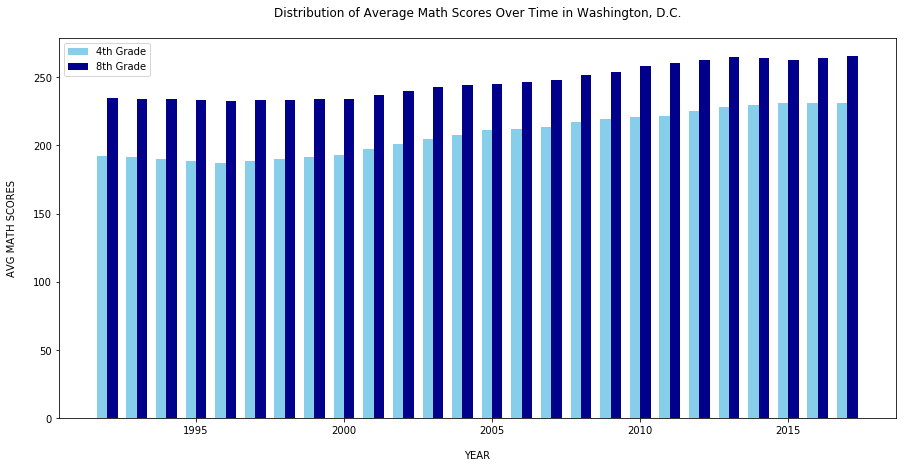

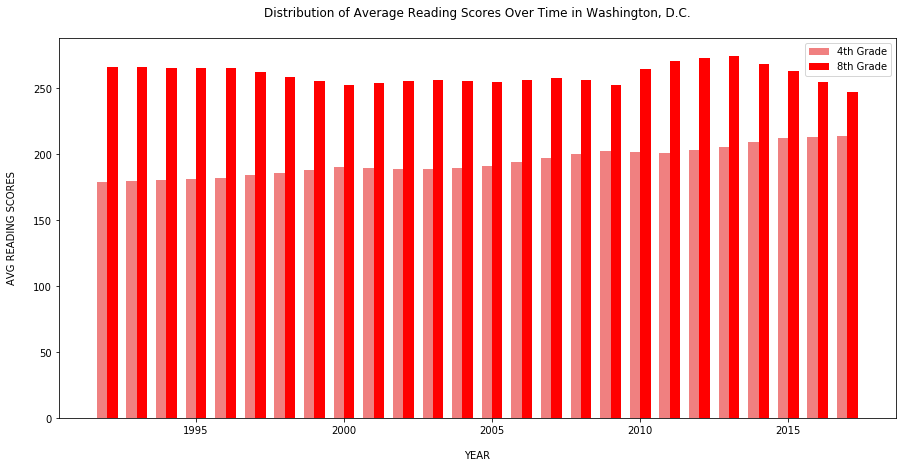

In [9]:
plt.figure(figsize=(15, 7))
colors_math = ['skyblue', 'darkblue']
bar_w = 0.35

plt.bar(education_df['YEAR'][education_df['STATE'] == state] - (bar_w/2), education_df['AVG_MATH_4_SCORE'][education_df['STATE'] == state], width = bar_w, color = colors_math[0], align = 'center', label = '4th Grade')
plt.bar(education_df['YEAR'][education_df['STATE'] == state] + (bar_w/2), education_df['AVG_MATH_8_SCORE'][education_df['STATE'] == state], width = bar_w, color = colors_math[1], align = 'center', label = '8th Grade')
plt.legend(loc='best')
plt.xlabel('\nYEAR')
plt.ylabel('AVG MATH SCORES\n')
plt.title('Distribution of Average Math Scores Over Time in Washington, D.C.\n')
plt.show()


plt.figure(figsize=(15, 7))
colors_reading = ['lightcoral', 'red']
bar_w = 0.35

plt.bar(education_df['YEAR'][education_df['STATE'] == state] - (bar_w/2), education_df['AVG_READING_4_SCORE'][education_df['STATE'] == state], width = bar_w, color = colors_reading[0], align = 'center', label = '4th Grade')
plt.bar(education_df['YEAR'][education_df['STATE'] == state] + (bar_w/2), education_df['AVG_READING_8_SCORE'][education_df['STATE'] == state], width = bar_w, color = colors_reading[1], align = 'center', label = '8th Grade')
plt.legend(loc='best')
plt.xlabel('\nYEAR')
plt.ylabel('AVG READING SCORES\n')
plt.title('Distribution of Average Reading Scores Over Time in Washington, D.C.\n')
plt.show()



### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

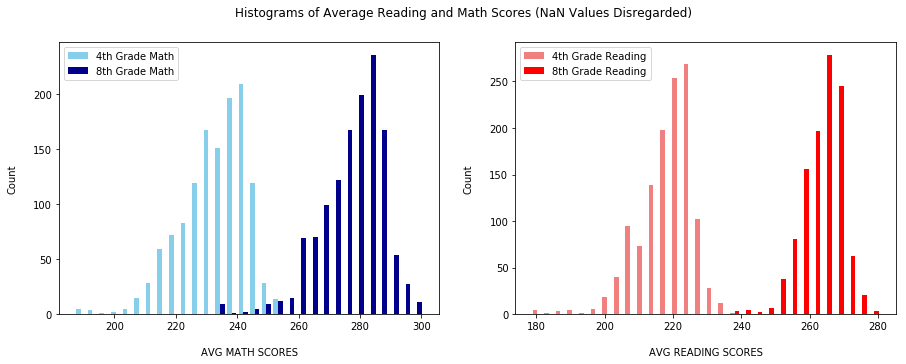

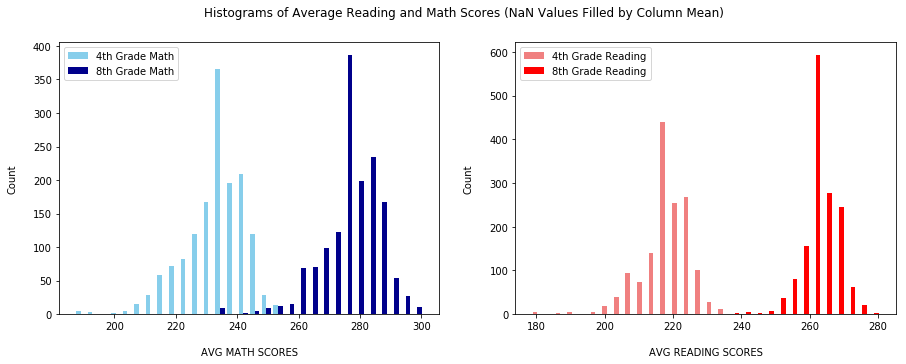

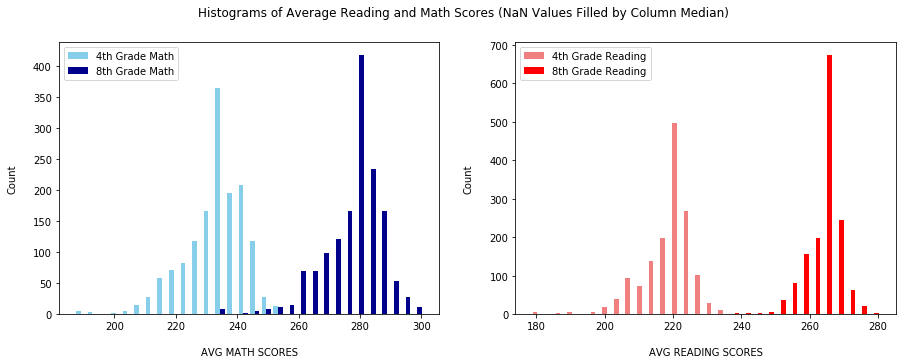

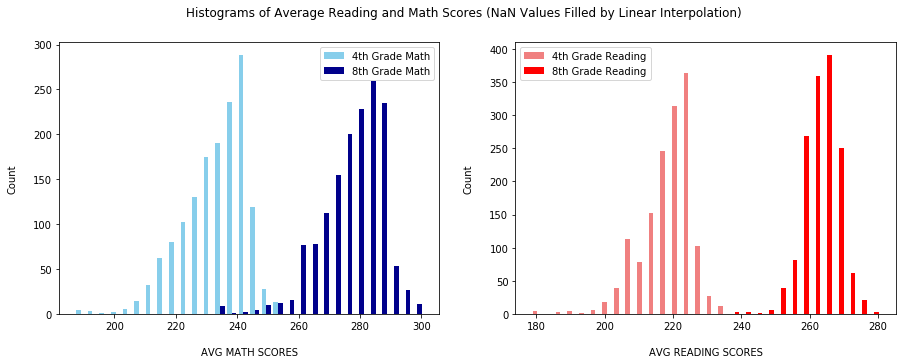

In [35]:
colors_math = ['skyblue', 'darkblue']
colors_reading = ['lightcoral', 'red']
bar_w = 0.35

#NaN values ignored
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist([education_df['AVG_MATH_4_SCORE'].dropna(), education_df['AVG_MATH_8_SCORE'].dropna()], bins = 30, label = ['4th Grade Math', '8th Grade Math'], color = colors_math)
plt.legend(loc='best')
plt.xlabel('\nAVG MATH SCORES')
plt.ylabel('Count\n')

plt.subplot(1,2,2)
plt.hist([education_df['AVG_READING_4_SCORE'].dropna(), education_df['AVG_READING_8_SCORE'].dropna()], bins = 30, label = ['4th Grade Reading', '8th Grade Reading'], color = colors_reading)
plt.legend(loc='best')
plt.xlabel('\nAVG READING SCORES')
plt.ylabel('Count\n')

plt.suptitle('Histograms of Average Reading and Math Scores (NaN Values Disregarded)')
plt.show()


#NaN values filled by mean of column
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist([education_df['AVG_MATH_4_SCORE'].fillna(education_df['AVG_MATH_4_SCORE'].mean()), education_df['AVG_MATH_8_SCORE'].fillna(education_df['AVG_MATH_8_SCORE'].mean())], bins = 30, label = ['4th Grade Math', '8th Grade Math'], color = colors_math)
plt.legend(loc='best')
plt.xlabel('\nAVG MATH SCORES')
plt.ylabel('Count\n')

plt.subplot(1,2,2)
plt.hist([education_df['AVG_READING_4_SCORE'].fillna(education_df['AVG_READING_4_SCORE'].mean()), education_df['AVG_READING_8_SCORE'].fillna(education_df['AVG_READING_8_SCORE'].mean())], bins = 30, label = ['4th Grade Reading', '8th Grade Reading'], color = colors_reading)
plt.legend(loc='best')
plt.xlabel('\nAVG READING SCORES')
plt.ylabel('Count\n')

plt.suptitle('Histograms of Average Reading and Math Scores (NaN Values Filled by Column Mean)')
plt.show()


#NaN values filled by median of column
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist([education_df['AVG_MATH_4_SCORE'].fillna(education_df['AVG_MATH_4_SCORE'].median()), education_df['AVG_MATH_8_SCORE'].fillna(education_df['AVG_MATH_8_SCORE'].median())], bins = 30, label = ['4th Grade Math', '8th Grade Math'], color = colors_math)
plt.legend(loc='best')
plt.xlabel('\nAVG MATH SCORES')
plt.ylabel('Count\n')

plt.subplot(1,2,2)
plt.hist([education_df['AVG_READING_4_SCORE'].fillna(education_df['AVG_READING_4_SCORE'].median()), education_df['AVG_READING_8_SCORE'].fillna(education_df['AVG_READING_8_SCORE'].median())], bins = 30, label = ['4th Grade Reading', '8th Grade Reading'], color = colors_reading)
plt.legend(loc='best')
plt.xlabel('\nAVG READING SCORES')
plt.ylabel('Count\n')

plt.suptitle('Histograms of Average Reading and Math Scores (NaN Values Filled by Column Median)')
plt.show()



#NaN values filled by linear interpolation
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.hist([education_df['AVG_MATH_4_SCORE'].interpolate(method='linear').dropna(), education_df['AVG_MATH_8_SCORE'].interpolate(method='linear').dropna()], bins = 30, label = ['4th Grade Math', '8th Grade Math'], color = colors_math)
plt.legend(loc='best')
plt.xlabel('\nAVG MATH SCORES')
plt.ylabel('Count\n')

plt.subplot(1,2,2)
plt.hist([education_df['AVG_READING_4_SCORE'].interpolate(method='linear').dropna(), education_df['AVG_READING_8_SCORE'].interpolate(method='linear').dropna()], bins = 30, label = ['4th Grade Reading', '8th Grade Reading'], color = colors_reading)
plt.legend(loc='best')
plt.xlabel('\nAVG READING SCORES')
plt.ylabel('Count\n')

plt.suptitle('Histograms of Average Reading and Math Scores (NaN Values Filled by Linear Interpolation)')
plt.show()

Probably because such a large proportion of these columns are NaNs, replacing the NaNs with the mean or median of the set leads to a strongly disproportionate representation among the middle values of the histogram, while simply dropping the NaNs or interpolating their replacement values has less of an effect and preserves the relative normalcy of the histogram curve. So, if we want to replace the NaNs without significantly affecting the distribution, we should use the linear interpolation method.